In [6]:
!pip install kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:01<00:00, 272MB/s]
100% 715M/715M [00:02<00:00, 375MB/s]


In [9]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [10]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [11]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [12]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.9/429.9 kB 30.4 MB/s eta 0:00:00


In [13]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [14]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing The Dependencies

In [15]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [16]:
file_names = os.listdir('/content/train')

In [17]:
type(file_names)

list

In [18]:
print(file_names[0:5])
print(file_names[-5:])

['42196.png', '11360.png', '8656.png', '38804.png', '2679.png']
['20436.png', '5084.png', '10226.png', '42989.png', '30376.png']


Labels Processing

In [19]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [20]:
labels_df.shape

(50000, 2)

In [21]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [23]:
labels_df.label.value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [29]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df.label]

In [30]:
labels[:5]

[6, 9, 9, 4, 1]

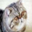

In [34]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/42196.png')
cv2_imshow(img)

In [38]:
id_list = list(labels_df.id)

In [39]:
id_list[:4]

[1, 2, 3, 4]

Image Processing

In [41]:
train_data_folder = '/content/train/'
data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [43]:
len(data)

50000

In [46]:
data[0].shape

(32, 32, 3)

array([[[170, 180, 198],
        [168, 178, 196],
        [177, 185, 203],
        ...,
        [162, 179, 215],
        [158, 178, 214],
        [157, 177, 212]],

       [[168, 181, 198],
        [172, 185, 201],
        [171, 183, 200],
        ...,
        [159, 177, 212],
        [156, 176, 211],
        [154, 174, 209]],

       [[154, 170, 186],
        [149, 165, 181],
        [129, 144, 162],
        ...,
        [161, 178, 214],
        [157, 177, 212],
        [154, 174, 209]],

       ...,

       [[ 74,  84,  80],
        [ 76,  85,  81],
        [ 78,  85,  82],
        ...,
        [ 71,  75,  78],
        [ 68,  72,  75],
        [ 61,  65,  68]],

       [[ 68,  76,  77],
        [ 69,  77,  78],
        [ 72,  79,  78],
        ...,
        [ 76,  80,  83],
        [ 71,  75,  78],
        [ 71,  75,  78]],

       [[ 67,  75,  78],
        [ 68,  76,  79],
        [ 69,  75,  76],
        ...,
        [ 75,  79,  82],
        [ 71,  75,  78],
        [ 73,  77,  80]]], dtype=uint8)
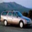

In [47]:
data[4]

In [48]:
X = np.array(data)
y = np.array(labels)

In [51]:
print(X.shape, y.shape)

(50000, 32, 32, 3) (50000,)
